# Redes Neuronales

**Perceptrón a mano**: Vamos a estudiar la función sigmoide y la entropía categórica para un caso sencillo, unidimensional. Vamos a encontrar el mínimo de la función de costo haciendo una exploración exhaustiva del espacio de parámetros, simil GridSearch.

El objetivo es ajustar un Perceptrón a los datos del Challenger. Recuerden estos datos tienen un solo feature, la temperatura. ¿Cuántos parámetros tendrá el Perceptrón?

1. Escribir una función que, dado un vector x y dos parámetros w0 y w1, calcula la función sigmoide. Hacer un plot para algunos parámetros, tratando de obtener los gráficos de la presentación.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
def sigmoid_function(x, w0, w1):
    '''Equivalente a perceptron con funcion de activacion sigmoide'''
    z = w0 + w1*x #notar que es una funcion lineal
    y = 1/(1 + np.exp(-z))   #notar que es una composicion
    return y

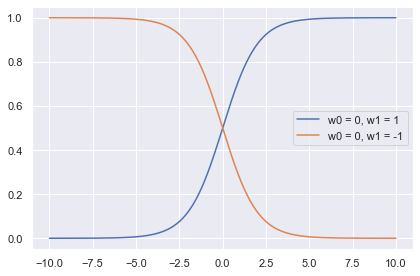

In [4]:
x = np.linspace(-10,10,500)

y = sigmoid_function(x, 0,1)
plt.plot(x,sigmoid_function(x, 0,1), label = 'w0 = 0, w1 = 1')
plt.plot(x,sigmoid_function(x, 0,-1), label = 'w0 = 0, w1 = -1')

plt.legend()
plt.tight_layout()
# plt.savefig('regresion_logistica.png', dpi = 400)

plt.show()

2. Escribir una función que, dado la etiqueta de una instancia `y` y una predicción `y_pred`, calcula la función de perdida *entropía cruzada*. Hacer un plot para el caso `y = 0` e `y = 1`, tratando de obtener los gráficos de la presentación.

In [5]:
def cross_entropy_loss(y, y_pred):
    L = -y*np.log(y_pred) - (1-y)*np.log(1 - y_pred)
    return L

C:\Users\lopez\AppData\Local\Temp/ipykernel_20520/3819969878.py:2: RuntimeWarning: divide by zero encountered in log
  L = -y*np.log(y_pred) - (1-y)*np.log(1 - y_pred)
C:\Users\lopez\AppData\Local\Temp/ipykernel_20520/3819969878.py:2: RuntimeWarning: invalid value encountered in multiply
  L = -y*np.log(y_pred) - (1-y)*np.log(1 - y_pred)


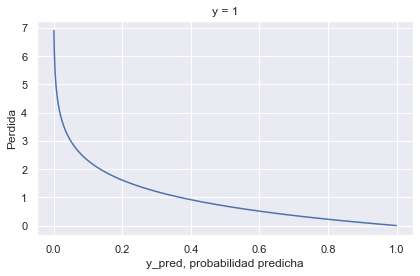

In [6]:
y = 1
ys_pred = np.linspace(0,1,1000)
plt.plot(ys_pred, cross_entropy_loss(y,ys_pred))
plt.xlabel('y_pred, probabilidad predicha')
plt.ylabel('Perdida')
plt.title('y = 1')
plt.tight_layout()
# plt.savefig('perdida_0.png', dpi = 400)
plt.show()

3. Escribir una función que, dado las etiquetas muchas instancias `y` y las predicciones `y_pred`, calcula la función de  costo *entropía cruzada* para todas las instancias. PISTA: hacer un `for` sobre las instancias y llamar a la función `cross_entropy_loss` que crearon antes.

In [7]:
def cross_entropy_cost(y, y_pred):
    ## Un sanity check
    assert y_pred.size == y.size, 'Ojo que los vectores no tienen el mismo tamanio'
    
    y_pred = y_pred.reshape(y_pred.size)
    y = y.reshape(y.size)
    J = 0
    for i in range(y_pred.size):
        J += cross_entropy_loss(y[i], y_pred[i])
    J /= y_pred.size
    return J

In [8]:
### Sólo para ver el código porque no se va a usar esta funcion de costo
def MSE(y,y_pred):
    '''Calcula Mean Squared Error'''
    assert(len(y) == len(y_pred))
    n = len(y)
    return ((y - y_pred)**2).sum()/n

**Datos del Challenger**

In [9]:
dataset = pd.read_csv('../DataSets/challenger.csv')
dataset.dropna(inplace = True) # Tiramos los NaN (una sola fila)
dataset['Temperature (C)'] = np.round((dataset['Temperature'] - 32)/1.8,2) # pasamos a celcius
dataset

,Date,Temperature,Damage Incident,Temperature (C)
0,04/12/1981,66,0,18.89
1,11/12/1981,70,1,21.11
2,3/22/82,69,0,20.56
4,01/11/1982,68,0,20.00
5,04/04/1983,67,0,19.44
6,6/18/83,72,0,22.22
7,8/30/83,73,0,22.78
8,11/28/83,70,0,21.11
9,02/03/1984,57,1,13.89
10,04/06/1984,63,1,17.22


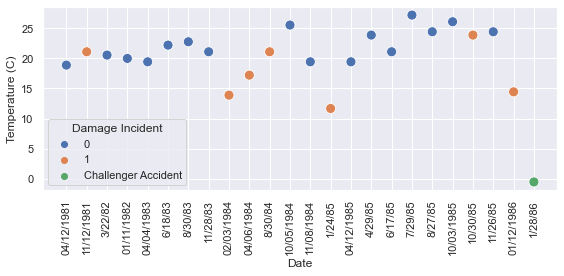

In [10]:
plt.figure(figsize = (8,4))
plot = sns.scatterplot(x = 'Date', y  = 'Temperature (C)', hue = 'Damage Incident', data = dataset, s = 100)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.tight_layout()
plt.show()

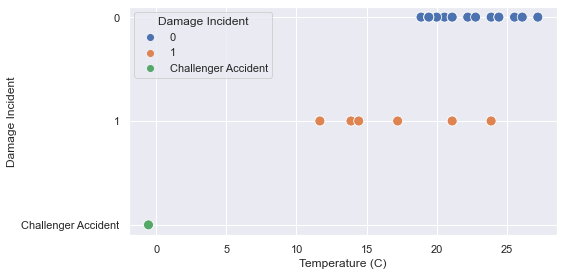

In [11]:
# dataset.drop([24], inplace = True)
plt.figure(figsize = (8,4))
plot = sns.scatterplot(x = 'Temperature (C)', y  = 'Damage Incident', hue = 'Damage Incident', data = dataset, s = 100)
plt.tight_layout()
plt.show()

**Variables para entrenamiento**

In [12]:
X = dataset.drop([24])['Temperature (C)'].values
y = dataset.drop([24])['Damage Incident'].values.astype(int)

Es muy importante reescalar los datos cuando trabajen con Redes Neuronales

In [13]:
X_mean = X.mean()
X_std = X.std()
X = (X - X_mean)/X_std

**Explorando la función de costo**

El objetivo es lograr obtener el gráfico de la función de costo. Para ellos, es importante que respondan: ¿cuántos parámetros tiene la función sigmoide/perceptrón?¿Qué tipo de gráfico quieren obtener?

1. Crear un arreglo con valores para w0 y w1 (`w0s, w1s`)

In [14]:
w0s = np.linspace(-5,0,50)
w1s = np.linspace(-5,0,50)

In [15]:
X

array([-0.51605061,  0.062933  , -0.08050888, -0.2265588 , -0.37260872,
        0.3524248 ,  0.49847472,  0.062933  , -1.82006774, -0.95159233,
        0.062933  ,  1.22350825, -0.37260872, -2.39905135, -0.37260872,
        0.78796653,  0.062933  ,  1.65644194,  0.93140841,  1.36695013,
        0.78796653,  0.93140841, -1.67662585])

In [16]:
X.flatten()

array([-0.51605061,  0.062933  , -0.08050888, -0.2265588 , -0.37260872,
        0.3524248 ,  0.49847472,  0.062933  , -1.82006774, -0.95159233,
        0.062933  ,  1.22350825, -0.37260872, -2.39905135, -0.37260872,
        0.78796653,  0.062933  ,  1.65644194,  0.93140841,  1.36695013,
        0.78796653,  0.93140841, -1.67662585])

2. Recorrer los dos arreglos y calcular el costo para cada combinación de parámetros `w0, w1`

In [17]:
#%%time
costos = []
for w0 in w0s:
    for w1 in w1s:
        y_pred = sigmoid_function(X.flatten(), w0,w1)
#         costos.append(MSE(y,y_pred))
        costos.append(cross_entropy_cost(y,y_pred))
costos = np.array(costos)

3. Graficar

In [18]:
W0s, W1s = np.meshgrid(w0s,w1s, indexing = 'ij')
costos_matriz = costos.reshape(w0s.size, w1s.size)

In [19]:
a = ([[1, 5, 2, 9],
       [3, 4, 5, 2]])
a

[[1, 5, 2, 9], [3, 4, 5, 2]]

In [20]:
np.argmin(a, axis=0)

array([0, 1, 0, 1], dtype=int64)

In [21]:
np.argmin(a, axis=1)

array([0, 3], dtype=int64)

In [22]:
costos_matriz.shape

(50, 50)

C:\Users\lopez\AppData\Local\Temp/ipykernel_20520/1528127112.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(W0s, W1s,costos_matriz)
C:\Users\lopez\AppData\Local\Temp/ipykernel_20520/1528127112.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


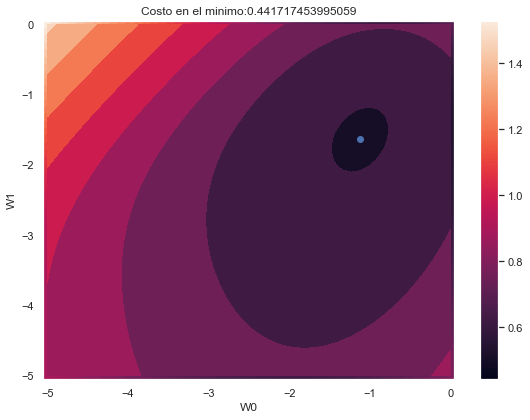

In [23]:
idxs_minimo = np.unravel_index(costos_matriz.argmin(), costos_matriz.shape)
fig = plt.figure(figsize = (8,6))
ax = fig.gca()

plt.pcolormesh(W0s, W1s,costos_matriz)
ax.contourf(W0s, W1s, costos_matriz)
plt.colorbar()
plt.scatter(W0s[idxs_minimo], W1s[idxs_minimo])
plt.title('Costo en el minimo:' + str(costos_matriz[idxs_minimo]))
plt.xlabel('W0')
plt.ylabel('W1')
plt.tight_layout()
plt.show()

In [24]:
w0_encontrado = W0s[idxs_minimo]
w1_encontrado = W1s[idxs_minimo]

print('w0 encontrado:', w0_encontrado)
print('w1 encontrado:', w1_encontrado)

w0 encontrado: -1.1224489795918364
w1 encontrado: -1.6326530612244898


C:\Users\lopez\AppData\Local\Temp/ipykernel_20520/4131056365.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
C:\Users\lopez\AppData\Local\Temp/ipykernel_20520/4131056365.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(surf)


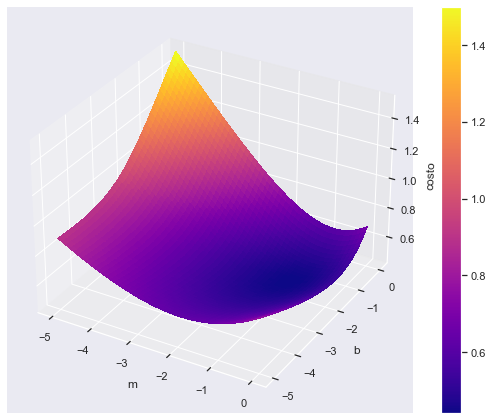

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize = (8,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(W0s, W1s,costos_matriz,linewidth=0.0, antialiased=False, cmap = 'plasma')
# ax.view_init(0, 180)
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('costo')
plt.tight_layout()
plt.colorbar(surf)    
plt.show()

4. Graficar la función sigmoide para los parámetros obtenidos.

In [26]:
X_mean

20.868695652173916

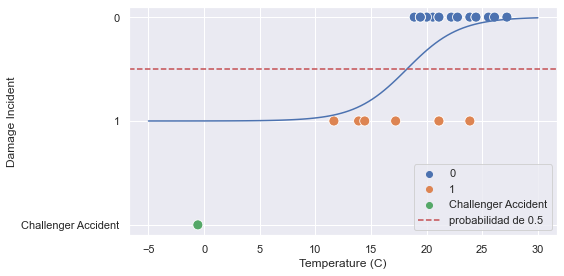

In [27]:
plt.figure(figsize = (8,4))
plot = sns.scatterplot(x = 'Temperature (C)', y  = 'Damage Incident', hue = 'Damage Incident', data = dataset, s = 100)

x_plot = np.linspace(-5,30,100)
z = (x_plot - X_mean)/X_std
plt.plot(x_plot, sigmoid_function(z,w0_encontrado,w1_encontrado))

plt.axhline(0.5, ls = '--', c = 'r', label = 'probabilidad de 0.5')
plt.legend()
plt.tight_layout()
plt.show()

### Scalares

In [28]:
x = np.array(42)
print(x.shape)
x.ndim

()


0

### Vectores

In [29]:
x = np.array([42,23,453,21,32,1,3,7])
print(x.shape)
x.ndim

(8,)


1

### Matrices

In [30]:
x = np.array([[42,23,453],
             [34,343,24]])
print(x.shape)
x.ndim

(2, 3)


2

### Tensores

In [31]:
x = np.array([[[42,23,453],
             [34,343,24]],
             [[42,23,453],
             [34,343,24]],
             [[42,23,453],
             [34,343,24]],
             [[42,23,453],
             [34,343,24]]])
print(x.shape)
x.ndim

(4, 2, 3)


3

### Método Reshape

In [32]:
x = np.array([[0,1],
             [2,3],
             [4,5],
             [6,7]])
x.shape

(4, 2)

In [35]:
x.reshape(8,1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [38]:
x.reshape(2,4)

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

### Método Transpose

In [39]:
np.transpose(x)

array([[0, 2, 4, 6],
       [1, 3, 5, 7]])

In [37]:
x.T

array([[0, 2, 4, 6],
       [1, 3, 5, 7]])

### Método Matmul (producto escalar)

In [40]:
a = np.array([[2,3],
[2,3],
[2,3]])
a.shape

(3, 2)

In [41]:
b = np.array([[1,6,5,2,7],
             [1,2,7,0,9]])
b.shape

(2, 5)

In [42]:
np.matmul(a,b)

array([[ 5, 18, 31,  4, 41],
       [ 5, 18, 31,  4, 41],
       [ 5, 18, 31,  4, 41]])

In [43]:
a@b

array([[ 5, 18, 31,  4, 41],
       [ 5, 18, 31,  4, 41],
       [ 5, 18, 31,  4, 41]])

# Red Neuronal con Numpy

## Creando set de datos

In [44]:
from sklearn.datasets import make_gaussian_quantiles

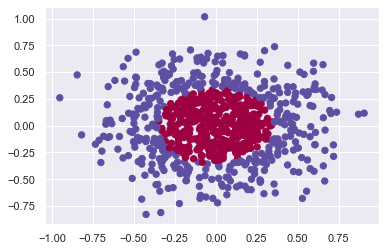

In [45]:
N = 800
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples=N,
                                             n_features=2,
                                             n_classes=2, 
                                             shuffle=True,
                                             random_state=None)
X, Y = gaussian_quantiles
Y = Y[:,np.newaxis]
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)
plt.show()

## Función de inicialización de parámetros

In [46]:
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)         
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    return parameters

# Función de activación

In [47]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)

In [48]:
x = np.linspace(10,-10,100)

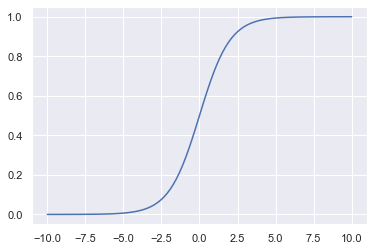

In [49]:
plt.plot(x,sigmoid(x))
plt.show()

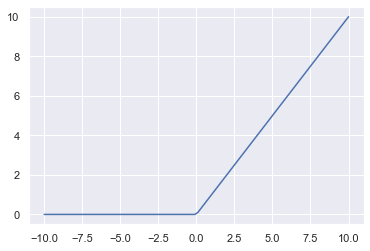

In [50]:
plt.plot(x,relu(x))
plt.show()

## Función de pérdida

In [51]:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)
    

## Función de entrenamiento

Partimos de los datos generados

In [52]:
X_data = X

In [53]:
type(X_data)

numpy.ndarray

In [55]:
X_data.shape

(800, 2)

Definimos el grado de aprendizaje (lr) y la arquitectura de la Red:
* 2 Datos de Entrada
* Capa 1 de 4 neuronas (2x4=8 parametros w + 4 de bias)
* Capa 2 de 8 neuronas (4x8=32 parametros w + 8 de bias)
* Capa 3 de salida con 1 neurona (8*1=8 parametros w + 1 de bias)

In [56]:
lr = 0.001
layer_dims =[2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)

In [ ]:
type(params)

dict

In [62]:
params

{'W1': array([[-0.45983626, -0.42659711, -0.85834965, -0.33450262],
        [ 0.20598292,  0.46962658,  0.74082483, -0.46123249]]),
 'b1': array([[ 0.72340748,  0.15608252, -0.70094158,  0.48601164]]),
 'W2': array([[ 0.77488637, -0.31998415,  0.03671812,  0.23843699,  0.37851676,
         -0.5884648 , -0.29340517,  0.33549688],
        [-0.32408374, -0.55584106, -0.29120771, -0.8280191 ,  0.74908432,
          0.28427034,  0.25540558,  0.83171047],
        [-0.72289083,  0.63839213,  0.66293294,  0.24429863, -0.68085883,
         -0.16142992,  0.28835809,  0.90210615],
        [ 0.64730555,  0.17620518, -0.15131685, -0.74618057, -0.28952879,
          0.03117554,  0.56442506,  0.58772471]]),
 'b2': array([[-0.27920014,  0.50982251, -0.96032254,  0.21297005, -0.54097014,
          0.36542177, -0.22291715,  0.72269399]]),
 'W3': array([[ 0.94254044],
        [ 0.09802622],
        [-0.08510815],
        [-0.11391162],
        [-0.32883394],
        [-0.70393424],
        [-0.63862842],


In [63]:
params['W1'].shape

(2, 4)

In [64]:
params['b1'].shape

(1, 4)

Se comienza el proceso de propagación hacia adelante (Forward propagation) , resolviendo los productos escalares capa tras capa:

In [65]:
params['A0'] = X_data

In [66]:
np.matmul(params['A0'],params['W1'])

array([[-0.02894303,  0.02711913,  0.01501779, -0.13945882],
       [ 0.03086418,  0.09271186,  0.1395885 , -0.11813013],
       [ 0.10188978,  0.15052325,  0.26183091, -0.04873639],
       ...,
       [ 0.1409628 ,  0.07152001,  0.18732406,  0.23253736],
       [-0.00161085, -0.08778047, -0.11339298,  0.18813078],
       [ 0.01036416, -0.01195165, -0.0082441 ,  0.05485424]])

In [67]:
np.matmul(params['A0'],params['W1']) + params['b1']

array([[ 0.69446446,  0.18320164, -0.6859238 ,  0.34655282],
       [ 0.75427167,  0.24879438, -0.56135308,  0.36788151],
       [ 0.82529727,  0.30660577, -0.43911068,  0.43727525],
       ...,
       [ 0.86437028,  0.22760253, -0.51361752,  0.718549  ],
       [ 0.72179663,  0.06830205, -0.81433456,  0.67414241],
       [ 0.73377165,  0.14413087, -0.70918568,  0.54086588]])

Z1 es la resultante del producto escalar en la capa 1

In [68]:
params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']

In [70]:
params['Z1'].shape

(800, 4)

A1 es la salida de la capa 1 (resultante de aplicar función de activación relu a Z1)

In [71]:
params['A1'] = relu(params['Z1'])

In [73]:
params['A1'].shape

(800, 4)

In [74]:
params['A1']

array([[0.69446446, 0.18320164, 0.        , 0.34655282],
       [0.75427167, 0.24879438, 0.        , 0.36788151],
       [0.82529727, 0.30660577, 0.        , 0.43727525],
       ...,
       [0.86437028, 0.22760253, 0.        , 0.718549  ],
       [0.72179663, 0.06830205, 0.        , 0.67414241],
       [0.73377165, 0.14413087, 0.        , 0.54086588]])

El proceso se repite para las capas 2 y 3

In [75]:
params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
params['Z2']

array([[ 0.42388379,  0.24683829, -1.04061212, ...,  0.01963665,
        -0.18428279,  1.31173303],
       [ 0.46277623,  0.19500003, -1.06074461, ...,  0.00375321,
        -0.17303934,  1.39888773],
       [ 0.54399622,  0.15236655, -1.08547225, ..., -0.0194454 ,
        -0.1399457 ,  1.51158335],
       ...,
       [ 0.78194709,  0.23333894, -1.10359267, ..., -0.05612791,
        -0.01282984,  1.62429593],
       [ 0.69435078,  0.35968133, -1.05571871, ..., -0.01889714,
        -0.03674841,  1.4178722 ],
       [ 0.59278452,  0.29021672, -1.05719396, ..., -0.0085431 ,
        -0.09611946,  1.40662749]])

In [76]:
params['A2'] = relu(params['Z2'])
params['A2']

array([[0.42388379, 0.24683829, 0.        , ..., 0.01963665, 0.        ,
        1.31173303],
       [0.46277623, 0.19500003, 0.        , ..., 0.00375321, 0.        ,
        1.39888773],
       [0.54399622, 0.15236655, 0.        , ..., 0.        , 0.        ,
        1.51158335],
       ...,
       [0.78194709, 0.23333894, 0.        , ..., 0.        , 0.        ,
        1.62429593],
       [0.69435078, 0.35968133, 0.        , ..., 0.        , 0.        ,
        1.4178722 ],
       [0.59278452, 0.29021672, 0.        , ..., 0.        , 0.        ,
        1.40662749]])

In [77]:
params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']

In [78]:
params['A3'] = sigmoid(params['Z3'])

Finalmente tenemos la salida final para cada dato de entrada

In [79]:
output = params['A3']

In [80]:
output.shape

(800, 1)

De aquí en adelante, se aplica el proceso de propagación hacia atrás (Back propagation)

Se obtiene el error, comparando la salida esperada con la resultante de la red. A partir de ese resultado se comienza a derivar aplicando la regla de la cadena para obtener los "delta" necesarios para ajustar los parámetros de la red

In [81]:
params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
params['dZ3']

array([[ 0.16269521],
       [ 0.16492053],
       [ 0.16813716],
       [ 0.17215751],
       [-0.05915746],
       [-0.03931635],
       [ 0.16698993],
       [ 0.16527658],
       [ 0.16952881],
       [ 0.16113949],
       [ 0.16185473],
       [-0.06394388],
       [-0.0376761 ],
       [-0.05831152],
       [-0.03886971],
       [-0.04407057],
       [-0.041453  ],
       [ 0.17186709],
       [ 0.17158206],
       [ 0.16364282],
       [ 0.1623777 ],
       [ 0.16081003],
       [-0.06701431],
       [ 0.1676057 ],
       [-0.07010077],
       [-0.06136754],
       [-0.04976174],
       [-0.0515487 ],
       [-0.03431649],
       [ 0.16695764],
       [ 0.16583667],
       [ 0.1726963 ],
       [-0.03679634],
       [ 0.16555419],
       [-0.04474092],
       [-0.06584759],
       [ 0.17145817],
       [-0.0358598 ],
       [ 0.16433748],
       [-0.03426742],
       [ 0.17200787],
       [-0.06193784],
       [ 0.16533107],
       [-0.05797896],
       [-0.04122728],
       [ 0

In [82]:
params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])

In [83]:
params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

Con esos valores de ajuste, se procede a realizar dicha operación teniendo en cuenta el grado de aprendizaje (lr = learning rate)

In [84]:
params['W3'] = params['W3'] - params['dW3'] * lr
params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
params['W2'] = params['W2'] - params['dW2'] * lr
params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
params['W1'] = params['W1'] -params['dW1'] * lr
params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr

In [85]:
def train(X_data,lr,params,training=True):
## Forward

    params['A0'] = X_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
    # Backpropagation
    
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        ## Gradinet Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

## Entrenando la red

In [86]:
layer_dims =[2, 4, 2, 1]
params = initialize_parameters_deep(layer_dims)
errors = []

In [87]:
for _ in range(10000):
    output = train(X,0.001,params)
    if _ % 25 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))

0.2677486418835009
0.2676988738145652
0.26764923637298904
0.26759972926975434
0.26755035221616014
0.267501104923825
0.2674519871046884
0.2674029984710127
0.2673541387353842
0.26730540761071564
0.26725680481024683
0.2672083300475476
0.2671599830365183
0.267111763491392
0.26706367112673585
0.26701570565745286
0.266967866798783
0.2669201542663056
0.26687256777593993
0.26682510704394724
0.26677777178693224
0.2667305617218445
0.26668347656598024
0.2666365160369826
0.26658967985284493
0.26654296773191105
0.2664963793928765
0.2664499145547907
0.26640357293705774
0.266357354259438
0.26631125824204965
0.2662652846053695
0.2662194330702349
0.2661737033578448
0.2661280951897609
0.2660826082879088
0.2660372423745805
0.26599199717243355
0.2659468724044942
0.265901867794158
0.26585698306519007
0.265812217941728
0.2657675721482816
0.26572304540973524
0.26567863745134795
0.26563434799875485
0.2655901767779691
0.26554612351538204
0.26550218793776487
0.26545836977226916
0.26541466874642866
0.26537108458

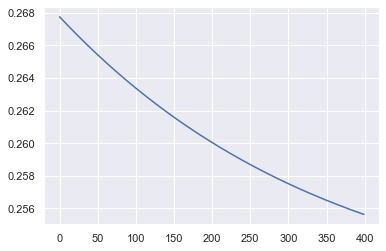

In [88]:
plt.plot(errors)
plt.show()

### Probando sobre datos nuevos

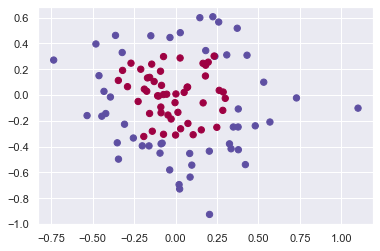

In [93]:
N = 100
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples=N,
                                             n_features=2,
                                             n_classes=2, 
                                             shuffle=True,
                                             random_state=None)
X, Y = gaussian_quantiles
Y = Y[:,np.newaxis]
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)
plt.show()

In [94]:
X

array([[-9.09342558e-02,  1.84399925e-01],
       [-4.62069077e-01,  1.49979711e-01],
       [-2.68982031e-01,  2.46710203e-01],
       [ 1.46376315e-01,  5.99223544e-01],
       [-1.69575325e-01,  1.32471199e-01],
       [-1.74029116e-01,  2.91445014e-02],
       [ 2.03573694e-01, -4.35379974e-01],
       [-4.21175333e-01, -1.43638619e-01],
       [-2.54691238e-01, -3.33433592e-01],
       [ 2.87231503e-01,  2.29387924e-02],
       [ 1.65345553e-01,  2.45534543e-01],
       [ 3.78579073e-01, -4.24237569e-01],
       [ 2.48746113e-01, -2.50391788e-01],
       [ 1.80032990e-01,  1.47414588e-01],
       [ 1.81425952e-01,  2.30841482e-01],
       [ 5.16062573e-02,  2.01184600e-02],
       [-2.10121755e-01,  1.99850733e-01],
       [-1.44002860e-01,  2.39350513e-01],
       [-1.29321682e-01,  1.04471851e-01],
       [ 7.29251706e-01, -2.27852496e-02],
       [ 2.82826261e-02,  4.83154469e-01],
       [-1.56288342e-01,  1.36746248e-01],
       [-3.54885223e-02, -5.80856842e-01],
       [-2.

In [95]:
Y

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [89]:
(np.random.rand(10, 2) * 2) - 1

array([[ 0.30454984,  0.64022962],
       [ 0.29574071, -0.99101666],
       [ 0.57170083, -0.31782171],
       [-0.66860271, -0.31649586],
       [-0.02461078, -0.97849266],
       [ 0.58882161, -0.57572771],
       [ 0.42242335,  0.42495784],
       [ 0.43461231, -0.2333346 ],
       [ 0.70620033, -0.20533679],
       [-0.08448126, -0.08819194]])

In [97]:
data_test = X
y = train(data_test,0.001,params,training=False)

In [90]:
data_test = (np.random.rand(800, 2) * 2) - 1
y = train(data_test,0.001,params,training=False)

In [98]:
y = np.where(y >= 0.5, 1, 0)

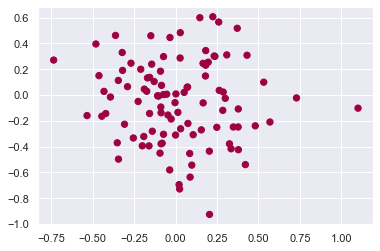

In [99]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0] ,s=40, cmap=plt.cm.Spectral)
plt.show()

## Malla de visualización

In [100]:
_x0 = np.linspace(-1,1,50)
_x1 = np.linspace(-1,1,50)

_y = np.zeros((50,50))

In [101]:
for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
        _y[i0,i1] = train(np.array([[x0,x1]]),0.0001,params,training=False)

C:\Users\lopez\AppData\Local\Temp/ipykernel_20520/2228105142.py:1: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(_x0,_x1,_y,cmap='coolwarm')


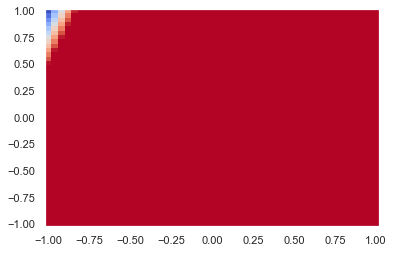

In [102]:
plt.pcolormesh(_x0,_x1,_y,cmap='coolwarm')
plt.show()